In [2]:
import xml.etree.cElementTree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import subprocess
import os
%matplotlib inline


# --------------- Latex Plot Beautification --------------------------
fig_width = 6
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------



In [3]:
## Generate input file:
# Let's figure out the source location given an incident angle!
D2R = np.pi/180.
aperture_entry = np.array([0,0,2.5])

r = 2.5
tvec = -1*np.arange(0,11,4)

filename = "run_multiple_angles.mac"
n_runs = 500000
with open(filename,'w') as file:
    file.write("# Autogenerated by electron_noisefloor_angular_sweep.ipynb\n")
    
    for theta in tvec:
        origin = aperture_entry + r*np.array([0, np.sin(theta*D2R), np.cos(theta*D2R)])
        direction = (aperture_entry - origin)
        direction = direction/np.linalg.norm(direction)
        file.write("# %g deg offset\n"%theta)
        file.write("/gps/position %2.4g %2.4g %2.4g cm\n"%(origin[0], origin[1], origin[2]))
        file.write("/gps/direction %2.4g %2.4g %2.4g cm\n"%(direction[0], direction[1], direction[2]))
        file.write("/analysis/setFileName electron_%g_deg\n"%theta)
        file.write("\n")
        file.write("/run/beamOn %d\n"%n_runs)
        file.write("\n")

In [8]:
def load_histo_file(filename):    
    hists = dict()
    axes  = dict()
    underflows = dict()
    overflows = dict()
    
    e = xml.etree.cElementTree.parse(filename).getroot()

    for hist in e.findall('histogram1d'):
        axis_info = hist.findall('axis')[0].attrib
        print axis_info
        bin_vals = pow(10,np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins'])))
#         bin_vals = np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins']))


        title = hist.attrib['title']

    #     print bin_vals
        cur_hist = np.zeros_like(bin_vals)
        for cell in hist.findall('data1d')[0]:
            try:
                binN=int(cell.attrib['binNum'])
                binH=int(cell.attrib['height'])
                cur_hist[binN] = binH
            except:
                if 'UNDERFLOW' in cell.attrib['binNum']:
                    underflows[title] = int(cell.attrib['height'])
                if 'OVERFLOW' in cell.attrib['binNum']:
                    overflows[title] = int(cell.attrib['height'])
        hists[title] = cur_hist
        axes[title]  = bin_vals

        print title, " has", np.sum(cur_hist), "values"
    return hists, axes, underflows, overflows


['electron_-4_deg.xml', 'electron_-8_deg.xml', 'electron_0_deg.xml']
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, from source, ev  has 488775.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, main detector, ev  has 488731.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, right detector, ev  has 32494.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, left detector, ev  has 32695.0 values
-------
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, from source, ev  has 488564.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, main detector, ev  has 228257.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, right detector, ev  has 97558.0 values
{'max': '7', 'direction': 'x', 'numberOfBins': '500', 'min': '2'}
Energy, left detector, ev  has 55140.0 values
-------
{'max': '7', 'dir

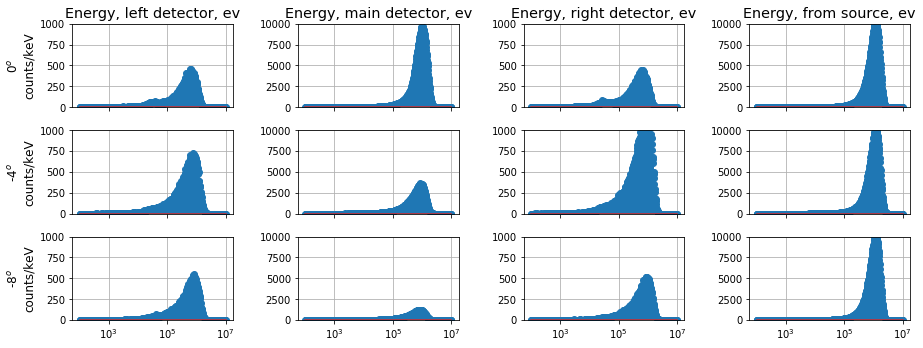

In [10]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 12
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


d = os.listdir('.')
files = [x for x in d if x.startswith('electron') and x.endswith(".xml")]
print files
angles = [0, -4, -8]

column_ymax = [1000, 10000, 1000, 10000]
fig, ax = plt.subplots(len(angles), 4, sharex='col', sharey='col')

for angle_ind, angle in enumerate(angles):
    filename = 'electron_%d_deg.xml'%angle
    hists, axes, underflows, overflows = load_histo_file(filename)
    print "-------"
    keylist = ['Energy, left detector, ev', 'Energy, main detector, ev', 'Energy, right detector, ev', 'Energy, from source, ev']
    for k_ind, key in enumerate(keylist):

        ax[angle_ind, k_ind].stem(axes[key], hists[key],zorder=100, alpha=0.7)
#         ax[angle_ind, k_ind].set_title(key)
        ax[angle_ind, k_ind].set_ylabel('counts')
        ax[angle_ind, k_ind].grid('on', zorder=0)

        ax[angle_ind, k_ind].set_xscale('log')
        ax[0, k_ind].set_title(key)
        ax[angle_ind, k_ind].set_ylabel('')
        ax[angle_ind, k_ind].set_ylim([0, column_ymax[k_ind]])
    ax[angle_ind, 0].set_ylabel('%d$^o$\ncounts/keV'%angle)

#     ax[].set_xlabel('Energy (keV)')

fig.tight_layout()



In [19]:
print hists.keys()

['Energy, left detector, kev', 'Energy, right detector, kev', 'Energy, main detector, kev', 'Energy, from source, kev']


In [7]:
print axes[key]

[2.         2.01002004 2.02004008 2.03006012 2.04008016 2.0501002
 2.06012024 2.07014028 2.08016032 2.09018036 2.1002004  2.11022044
 2.12024048 2.13026052 2.14028056 2.1503006  2.16032064 2.17034068
 2.18036072 2.19038076 2.2004008  2.21042084 2.22044088 2.23046092
 2.24048096 2.250501   2.26052104 2.27054108 2.28056112 2.29058116
 2.3006012  2.31062124 2.32064128 2.33066132 2.34068136 2.3507014
 2.36072144 2.37074148 2.38076152 2.39078156 2.4008016  2.41082164
 2.42084168 2.43086172 2.44088176 2.4509018  2.46092184 2.47094188
 2.48096192 2.49098196 2.501002   2.51102204 2.52104208 2.53106212
 2.54108216 2.5511022  2.56112224 2.57114228 2.58116232 2.59118236
 2.6012024  2.61122244 2.62124248 2.63126253 2.64128257 2.65130261
 2.66132265 2.67134269 2.68136273 2.69138277 2.70140281 2.71142285
 2.72144289 2.73146293 2.74148297 2.75150301 2.76152305 2.77154309
 2.78156313 2.79158317 2.80160321 2.81162325 2.82164329 2.83166333
 2.84168337 2.85170341 2.86172345 2.87174349 2.88176353 2.891783